In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rudranshagnihotri","key":"4454978f6c4ee7ff83dfb0711779fe4c"}'}

In [14]:
!pip install -q kaggle

In [18]:
!mkdir ~/. kaggle

mkdir: cannot create directory ‘/root/.’: File exists
mkdir: cannot create directory ‘kaggle’: File exists


In [19]:
!cp kaggle.json ~/.kaggle/

In [20]:
!chmod 600 ~/.kaggle/kaggle.json

In [21]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 94% 401M/428M [00:11<00:00, 30.0MB/s]
100% 428M/428M [00:11<00:00, 40.2MB/s]


In [22]:
!mkdir data

In [23]:
!unzip toronto-emotional-speech-set-tess.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: data/TESS Toronto emotional speech set data/OAF_angry/OAF_

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import librosa 
import tensorflow as tf
from keras.layers import LSTM , Dense , Dropout
from keras.models import Sequential 
 

In [ ]:
len(os.listdir("/content/data/TESS Toronto emotional speech set data/OAF_Fear"))

200

In [ ]:
len(os.listdir("/content/data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear"))

200

In [24]:

data_path = []
data_label = []

def process_data(path,path_list,label_list):
  for dir,_,files in os.walk(path):
    for file in files:
      path_list.append(os.path.join(dir,file))
      label = file.split('_')[-1]
      label = label.split('.')[0]
      label_list.append(label.lower())


In [25]:
process_data("/content/data/TESS Toronto emotional speech set data/",data_path,data_label)
process_data("/content/data/tess toronto emotional speech set data/TESS Toronto emotional speech set data/",data_path,data_label)

In [26]:
len(data_path),len(data_label)

(5600, 5600)

In [27]:
import pandas as pd 
df=pd.DataFrame()
df['audio']=data_path
df['class']=data_label
df.head()

,audio,class
0,/content/data/TESS Toronto emotional speech se...,angry
1,/content/data/TESS Toronto emotional speech se...,angry
2,/content/data/TESS Toronto emotional speech se...,angry
3,/content/data/TESS Toronto emotional speech se...,angry
4,/content/data/TESS Toronto emotional speech se...,angry


In [28]:
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()    

In [29]:
data,sr = librosa.load(data_path[0])

In [30]:
print(data_label[0])

angry


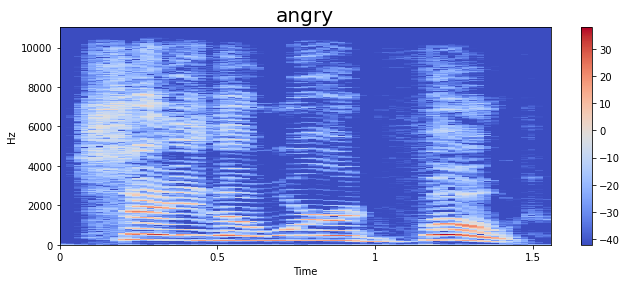

In [31]:
import librosa.display
spectogram(data,sr,'angry')

In [32]:
def mfcc(file):
  y,sr  = librosa.load(file, duration=3,offset = 0.5)
  mfcc_feature=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfcc_feature

In [33]:
x_data = df['audio'].apply(lambda x:mfcc(x))

In [39]:
x_train_data = []
for i in x_data:
  x_train_data.append(i)

In [40]:
len(x_train_data)

5600

In [41]:
x_train_data=np.array(x_train_data)
x_train_data = np.expand_dims(x_train_data,-1)
x_train_data.shape

(5600, 40, 1)

In [42]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y_target=enc.fit_transform(df[['class']])

In [43]:
y_target=y_target.toarray()
y_target.shape

(5600, 7)

In [ ]:
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax'),
    
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary() 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-traina

In [ ]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
with tf.device('cpu'):
  history=model.fit(x_train_data, y_target, validation_split=0.3, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
8/8 [==============================] - 2s 274ms/step - loss: 0.5997 - accuracy: 0.7903 - val_loss: 0.5371 - val_accuracy: 0.8287
Epoch 2/100
8/8 [==============================] - 2s 274ms/step - loss: 0.4546 - accuracy: 0.8492 - val_loss: 0.3686 - val_accuracy: 0.8858
Epoch 3/100
8/8 [==============================] - 2s 273ms/step - loss: 0.3648 - accuracy: 0.8852 - val_loss: 0.3229 - val_accuracy: 0.9024
Epoch 4/100
8/8 [==============================] - 2s 275ms/step - loss: 0.2931 - accuracy: 0.9161 - val_loss: 0.2305 - val_accuracy: 0.9340
Epoch 5/100
8/8 [==============================] - 2s 277ms/step - loss: 0.2506 - accuracy: 0.9288 - val_loss: 0.2148 - val_accuracy: 0.9358
Epoch 6/100
8/8 [==============================] - 2s 277ms/step - loss: 0.2189 - accuracy: 0.9372 - val_loss: 0.1448 - val_accuracy: 0.9572
Epoch 7/100
8/8 [==============================] - 2s 278ms/step - loss: 0.1744 - accuracy: 0.9505 - val_loss: 0.1432 - val_accuracy: 0.9578
Epoch 8/100
8

In [ ]:
model_json = model.to_json()
with open("emotion.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("emotion.h5")
print("Saved model to disk")

Saved model to disk


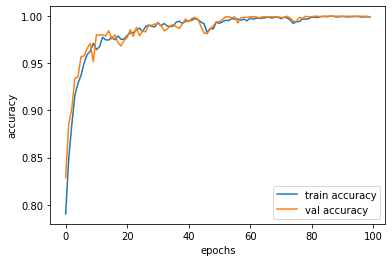

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


In [4]:
from keras.models import model_from_json
json_file = open('/content/emotion.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/emotion.h5")

In [61]:
audio_path = "/content/data/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav"


In [62]:
test = mfcc(audio_path)
print(test)
test = np.array(test)
test = np.expand_dims(test,0)
test.shape

[-3.9729318e+02  7.9211685e+01 -2.0517956e+01 -2.0551582e+01
 -3.4529982e+00  1.1347473e+01 -2.1935171e+01 -5.0233850e+00
 -8.3073492e+00  2.9242066e-01 -2.9758680e+00  1.2660054e+00
 -1.7523338e-01  1.8509505e+00  1.9871240e+00  3.9860995e+00
 -5.4102554e+00 -3.8638127e+00 -2.3044806e+00 -9.6431236e+00
 -8.0843172e+00 -1.1284140e+00 -7.5141149e+00  1.0146489e+01
  7.9138660e+00  2.1983124e+01  1.8977406e+01  2.0444784e+01
  1.2773611e+01  8.3994579e+00  2.4766926e-01  5.0292034e+00
  9.4923096e+00  5.2336197e+00  2.6688082e+00 -1.8356627e+00
  4.9555316e+00  8.8204899e+00  2.3240747e+00 -2.1129131e+00]


(1, 40)

In [64]:
with tf.device("cpu"):
  result = loaded_model.predict(test)
  #print(result)
  x = np.argmax(result, axis=-1)
  print(x)
  x = enc.inverse_transform(result)
  print(x)

[0]
[['angry']]


In [65]:
print(enc.inverse_transform([[1,0,0,0,0,0,0]]))#[0]
print(enc.inverse_transform([[0,1,0,0,0,0,0]]))#[1]
print(enc.inverse_transform([[0,0,1,0,0,0,0]]))#[2]
print(enc.inverse_transform([[0,0,0,1,0,0,0]]))#[3]
print(enc.inverse_transform([[0,0,0,0,1,0,0]]))#[4]
print(enc.inverse_transform([[0,0,0,0,0,1,0]]))#[5]
print(enc.inverse_transform([[0,0,0,0,0,0,1]]))#[6]

[['angry']]
[['disgust']]
[['fear']]
[['happy']]
[['neutral']]
[['ps']]
[['sad']]


In [48]:
data_path.index("/content/data/TESS Toronto emotional speech set data/OAF_Fear/OAF_back_fear.wav")


1990